NameError: name 'x_rk2' is not defined

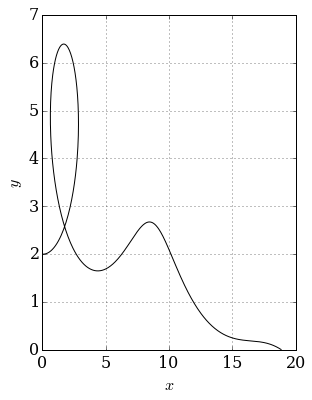

In [1]:
from math import sin, cos, log
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 4.9    # trim velocity in m s^{-1}   
C_D = 1/5.0  # drag coefficient --- or D/L if C_L=1
C_L = 1.0    # for convenience, use C_L = 1

### set initial conditions ###
v0 = 14     # start at the trim velocity (or add a delta)
theta0 = 0 # initial angle of trajectory
x0 = 0.0     # horizotal position is arbitrary
y0 = 2.0     # initial altitude
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def f(u):
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])



def euler_step(u, f, dt):
  
    
    return u + dt * f(u)


##def get_diffgrid(u_current, u_fine, dt):
##    """Returns the difference between one grid and the fine one using L-1 norm.
    
##    Parameters
##    ----------
##    u_current : array of float
##        solution on the current grid.
##    u_finest : array of float
##        solution on the fine grid.
##    dt : float
##        time-increment on the current grid.
    
##    Returns
##    -------
##    diffgrid : float
##        difference computed in the L-1 norm.
##    """
    
##    N_current = len(u_current[:,0])
##    N_fine = len(u_fine[:,0])
   
##    grid_size_ratio = numpy.ceil(N_fine/N_current)
    
##    diffgrid = dt * numpy.sum( numpy.abs(\
##            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
##    return diffgrid
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
##def rk2_step(u, f, dt):
##    """Returns the solution at the next time-step using 2nd-order Runge-Kutta.
    
##    Parameters
##    ----------
##    u : array of float
##        solution at the previous time-step.
##    f : function
##        function to compute the right hand-side of the system of equation.
##   dt : float
##        time-increment.
    
##    Returns
##    -------
##    u_n_plus_1 : array of float
##        solution at the next time step.
##    """
##    u_star = u + 0.5*dt*f(u)
##    return u + dt*f(u_star)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps


# set initial conditions
u_euler = numpy.empty((N, 4))
##u_rk2   = numpy.empty((N, 4))


# initialize the array containing the solution for each time-step
u_euler[0] = numpy.array([v0, theta0, x0, y0])
##u_rk2[0]   = numpy.array([v0, theta0, x0, y0])


# use a for loop to call the function rk2_step()
for n in range(N-1):
    
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
##    u_rk2[n+1]   = rk2_step(u_rk2[n], f, dt)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
x_euler = u_euler[:,2]
y_euler = u_euler[:,3]
##x_rk2 = u_rk2[:,2]
##y_rk2 = u_rk2[:,3]
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# get the index of element of y where altitude becomes negative
idx_negative_euler = numpy.where(y_euler<0.0)[0]
if len(idx_negative_euler)==0:
    idx_ground_euler = N-1
    print ('Euler integration has not touched ground yet!')
else:
    idx_ground_euler = idx_negative_euler[0]
    
##idx_negative_rk2 = numpy.where(y_rk2<0.0)[0]
##if len(idx_negative_rk2)==0:
##    idx_ground_rk2 = N-1
##    print ('Runge-Kutta integration has not touched ground yet!')
##else:
##    idx_ground_rk2 = idx_negative_rk2[0]
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# check to see if the paths match
##print('Are the x-values close? {}'.format(numpy.allclose(x_euler, x_rk2)))
##print('Are the y-values close? {}'.format(numpy.allclose(y_euler, y_rk2)))
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plot the glider path
pyplot.figure(figsize=(10,6))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler], 'k-', label='Euler')
##pyplot.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2], 'r--', label='RK2')
pyplot.title('distance traveled: {:.3f}'.format(x_rk2[idx_ground_rk2-1]))
pyplot.legend();

18.8852026085


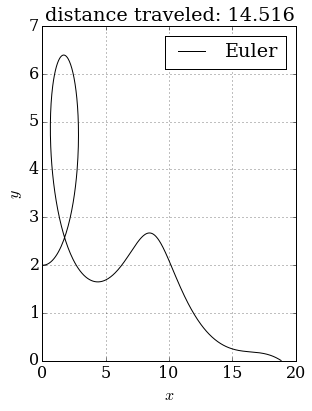

In [164]:
from math import sin, cos, log
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 4.9    # trim velocity in m s^{-1}   
C_D = 1/5.0  # drag coefficient --- or D/L if C_L=1
C_L = 1.0    # for convenience, use C_L = 1

### set initial conditions ###
v0 = 14     # start at the trim velocity (or add a delta)
theta0 = 0 # initial angle of trajectory
x0 = 0.0     # horizotal position is arbitrary
y0 = 2.0     # initial altitude
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def f(u):
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])



def euler_step(u, f, dt):
    return u + dt * f(u)


# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps


# set initial conditions
u_euler = numpy.empty((N, 4))


# initialize the array containing the solution for each time-step
u_euler[0] = numpy.array([v0, theta0, x0, y0])


# use a for loop to call the function rk2_step()
for n in range(N-1):
    
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
x_euler = u_euler[:,2]
y_euler = u_euler[:,3]
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# get the index of element of y where altitude becomes negative
idx_negative_euler = numpy.where(y_euler<0.0)[0]
if len(idx_negative_euler)==0:
    idx_ground_euler = N-1
    print ('Euler integration has not touched ground yet!')
else:
    idx_ground_euler = idx_negative_euler[0]
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plot the glider path
pyplot.figure(figsize=(10,6))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler], 'k-', label='Euler')
pyplot.title('distance traveled: {:.3f}'.format(x_rk2[idx_ground_rk2-1]))
pyplot.legend();
print(x_euler[idx_ground_euler])

In [163]:
from math import sin, cos, log
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 4.9    # trim velocity in m s^{-1}   
C_D = 1/5.0  # drag coefficient --- or D/L if C_L=1
C_L = 1.0    # for convenience, use C_L = 1

### set initial conditions ###
#v0 = 6.5     # start at the trim velocity (or add a delta)
#theta0 = -0.1 # initial angle of trajectory
x0 = 0.0     # horizotal position is arbitrary
y0 = 2.0     # initial altitude
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def f(u):    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])

def euler_step(u, f, dt):
    return u + dt * f(u)

# set time-increment and discretize the time
    T  = 15.0                           # final time
    dt = 0.01                           # set time-increment
    N  = int(T/dt) + 1                  # number of time-steps

# set initial conditions
u_euler = numpy.empty((N, 4))
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
times=0 # account times
for theta0 in range(1,70,1):
    for v0 in range(3,13,1): 
        times=times+1 # account times
        
ux_euler = numpy.empty(times)
total_ux_euler = numpy.zeros((times, 4))
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
i=0    # account times 
Max_X=0

for theta0 in range(1,70,1):
    #theta=-0.1
    print(theta0)    
    for v0 in range(3,13,1):
        
        ##print(v0)
        ##print("theta=",theta,"v0=",v0)
        # initialize the array containing the solution for each time-step
        u_euler[0] = numpy.array([v0, theta0, x0, y0])

        # use a for loop to call the function rk2_step()
        for n in range(N-1):    
                u_euler[n+1] = euler_step(u_euler[n], f, dt)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        x_euler = u_euler[:,2]
        y_euler = u_euler[:,3]
        ##print(x_euler)
        #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        # get the index of element of y where altitude becomes negative
        idx_negative_euler = numpy.where(y_euler<0.0)[0]
        if len(idx_negative_euler)==0:
            idx_ground_euler = N-1
            print ('Euler integration has not touched ground yet!')
        else:
            idx_ground_euler = idx_negative_euler[0]            
        
        
        print("i=",i)
        print("X_distance=",x_euler[idx_ground_euler])
        print("theta0=",theta0)
        print("v0=",v0)
        total_ux_euler[i,0]=i
        total_ux_euler[i,1]=x_euler[idx_ground_euler]
        total_ux_euler[i,2]=theta0
        total_ux_euler[i,3]=v0
        print("total_ux_euler=",total_ux_euler)
        print("--------------------------")
        ux_euler[i]=x_euler[idx_ground_euler]
        i=i+1
        ##print("ux_euler=",ux_euler)
       
        #if Max_X<x_euler[N-idx_ground_euler]:
        #    Max_X=x_euler[N-idx_ground_euler]
        
        #i=i+1
      
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


1
i= 0
X_distance= 2.19604730017
theta0= 1
v0= 3
total_ux_euler= [[ 0.         2.1960473  1.         3.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]
 ..., 
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]]
--------------------------
i= 1
X_distance= 2.87975555733
theta0= 1
v0= 4
total_ux_euler= [[ 0.          2.1960473   1.          3.        ]
 [ 1.          2.87975556  1.          4.        ]
 [ 0.          0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
--------------------------
i= 2
X_distance= 3.32862527487
theta0= 1
v0= 5
total_ux_euler= [[ 0.          2.1960473   1.          3.        ]
 [ 1.          2.87975556  1.          4.        ]
 [ 2.          3.32862527  1.          5.        

/home/longteng09/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:28: RuntimeWarning: overflow encountered in double_scalars


ValueError: math domain error

In [158]:
a=total_ux_euler[:,1]
print(a)
b=max(a)
print("Max=",b)
#c=total_ux_euler[:,1]
#d=c.index(a)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#x_distance=x_euler[idx_ground_euler]
#print(x_distance)
#print(ux_euler) 
#print("first=",ux_euler[0])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#print("Max=",max(ux_euler))
#new_ux_euler=round(ux_euler,2)
#print(new_ux_euler)
#print("Position=",ux_euler.index(max(ux_euler)))


    

[  9.640074    10.06857378  13.45092131  15.85441249   3.51149794
  10.68013653]
Max= 15.854412486


In [ ]:



#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        # plot the glider path
        pyplot.figure(figsize=(10,6))
        pyplot.subplot(121)
        pyplot.grid(True)
        pyplot.xlabel('$x$')
        pyplot.ylabel('$y$')
        pyplot.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler], 'k-', label='Euler')
        pyplot.title('distance traveled: {:.3f}'.format(x_rk2[idx_ground_rk2-1]))
        pyplot.legend()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                  
                  
                  

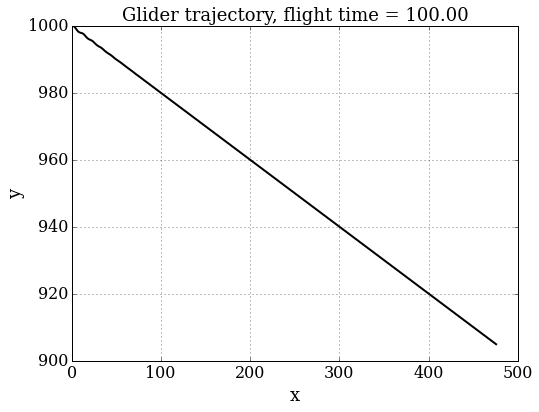

In [24]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 4.9   # trim velocity in m s^{-1}   
C_D = 1/5  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1

### set initial conditions ###
v0 = v_t     # start at the trim velocity (or add a delta)
theta0 = 0 # initial angle of trajectory
x0 = 0     # horizotal position is arbitrary
y0 = 1000  # initial altitude
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                       v*sin(theta)])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def euler_step(u, f, dt):   
    return u + dt * f(u)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
T = 100                          # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps
t = numpy.linspace(0, T, N)      # time discretization

# initialize the array containing the solution for each time-step
u = numpy.empty((N, 4))
u[0] = numpy.array([v0, theta0, x0, y0])# fill 1st element with initial values

# time loop - Euler method
for n in range(N-1):
    
    u[n+1] = euler_step(u[n], f, dt)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# get the glider's position with respect to the time
x = u[:,2]
y = u[:,3]
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [25]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt) + 1    # number of time-steps
    
    ### discretize the time t ###
    t = numpy.linspace(0.0, T, N)
    
    # initialize the array containing the solution for each time-step
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])

    # time loop
    for n in range(N-1):
       
        u[n+1] = euler_step(u[n], f, dt)   ### call euler_step() ###
    
    # store the value of u related to one grid
    u_values[i] = u
    

In [26]:
def get_diffgrid(u_current, u_fine, dt):
    """Returns the difference between one grid and the fine one using L-1 norm.
    
    Parameters
    ----------
    u_current : array of float
        solution on the current grid.
    u_finest : array of float
        solution on the fine grid.
    dt : float
        time-increment on the current grid.
    
    Returns
    -------
    diffgrid : float
        difference computed in the L-1 norm.
    """
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid


In [21]:
# compute difference between one grid solution and the finest one
diffgrid = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    print('dt = {}'.format(dt))

    ### call the function get_diffgrid() ###
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)
    
    

dt = 0.1
dt = 0.05
dt = 0.01
dt = 0.005
dt = 0.001


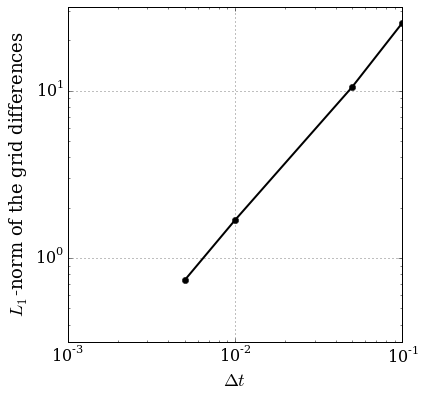

In [27]:
# log-log plot of the grid differences
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=2, marker='o');

